The Dataset used here is downloaded from kaggle.
link : "https://www.kaggle.com/alxmamaev/flowers-recognition"


The data collection is based on scraped data from flickr, google images, and yandex images.

The credit for the dataset is to Alexandar Mamaev.

In this script we will build CNN to identiy images of 5 different types of flowers. First we will create our own CNN and use data augmentation. Then we will use a highly used pretrained model VGG16 of Keras. We will check the performance for both of the techniques. 

In [2]:
# Importing necessary libraries
import tensorflow as tf
import numpy as np
import os
import pathlib
import PIL
import random
import matplotlib.pyplot as plt


from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers, activations, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Checking total number of images and types of flowers
dataset_dir = 'C:/Users/emamu/Downloads/flowers'
dataset_dir = pathlib.Path(dataset_dir)

print('The number of total images : ', len(list(dataset_dir.glob('*/*.jpg'))))

flower_names = os.listdir(dataset_dir)
print('The name of the flowers', flower_names)

The number of total images :  4323
The name of the flowers ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


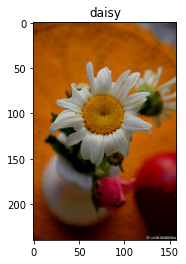

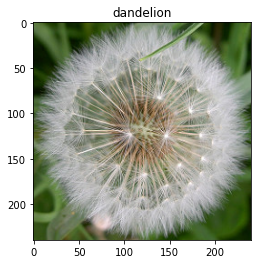

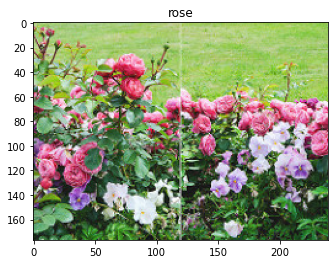

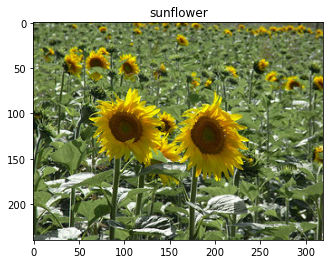

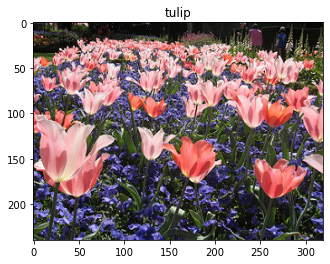

In [6]:
# Let's see one example from each type of the flowers
for i in range(len(flower_names)):
    flower_type = list(dataset_dir.glob(str(flower_names[i] + '/*')))
    plt.imshow(PIL.Image.open(str(flower_type[random.randint(0, 100)])))
    plt.title(flower_names[i])
    plt.show()

In [4]:
batch_size = 32
img_height = 180
img_width = 180

# Section - 01

Using own build CNN

In [5]:
# Using Imagedatagenerator to preprocess the images with augmentation
train_datagen = ImageDataGenerator( rescale=1. / 255, rotation_range=40,
                                   zoom_range=0.2, shear_range=0.2,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   validation_split=0.2)

validation_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir, target_size=(img_width, img_height),
    batch_size=batch_size, subset='training',
    seed=42, shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
    dataset_dir, target_size=(img_width, img_height),
    batch_size=batch_size, subset='validation',
    seed=42, shuffle=True)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [10]:
# Checking the shape of the training dataset and target label
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32, 5)


In [13]:
# Creating the base CNN model
model = models.Sequential()
model.add(layers.Conv2D(8, (3,3),  activation=activations.relu, padding='same',
                        input_shape=(img_height,img_width, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(16, (3,3),  activation=activations.relu, padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3),  activation=activations.relu, padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3),  activation=activations.relu, padding='same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation=activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation=activations.relu))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation=activations.softmax))

model.compile(optimizer= optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)       

In [14]:
# Training the model

history = model.fit_generator(train_generator, steps_per_epoch=109,
                              validation_data=validation_generator, validation_steps=27, 
                              epochs=30)

Epoch 1/30
109/109 [==============================] - 40s 356ms/step - loss: 1.4786 - accuracy: 0.3220 - val_loss: 1.1989 - val_accuracy: 0.4925
Epoch 2/30
109/109 [==============================] - 38s 346ms/step - loss: 1.1496 - accuracy: 0.5276 - val_loss: 1.0289 - val_accuracy: 0.5900
Epoch 3/30
109/109 [==============================] - 35s 319ms/step - loss: 1.0038 - accuracy: 0.6046 - val_loss: 0.9253 - val_accuracy: 0.6283
Epoch 4/30
109/109 [==============================] - 34s 311ms/step - loss: 0.9758 - accuracy: 0.6177 - val_loss: 0.8809 - val_accuracy: 0.6632
Epoch 5/30
109/109 [==============================] - 34s 314ms/step - loss: 0.9229 - accuracy: 0.6504 - val_loss: 0.8914 - val_accuracy: 0.6492
Epoch 6/30
109/109 [==============================] - 34s 310ms/step - loss: 0.8503 - accuracy: 0.6582 - val_loss: 0.9324 - val_accuracy: 0.6400
Epoch 7/30
109/109 [==============================] - 35s 317ms/step - loss: 0.8747 - accuracy: 0.6724 - val_loss: 0.8928 - val_ac

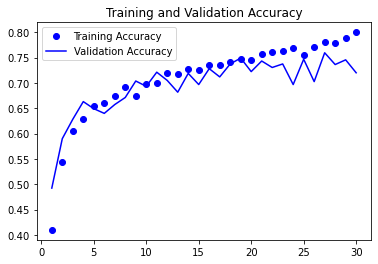

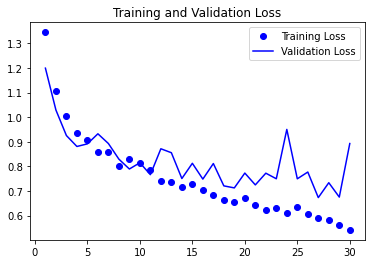

In [15]:
# Let's see the performance of the model
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Section - 2
Using pretrained model but without data augmentation

In [8]:
# Now we will use a widely used pretrained model named VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [17]:
# Creating Imagedatagenerator instances again without data augmentation
# As using augmentation is very much computational expensive, we will only extract the features once
# and then train a dense network on the extracted features

train_datagen_vgg = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
validation_datagen_vgg = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

train_generator_vgg = train_datagen_vgg.flow_from_directory(
    dataset_dir, target_size=(img_width, img_height),
    batch_size=batch_size, subset='training',
    seed=42, shuffle=True)
validation_generator_vgg = validation_datagen_vgg.flow_from_directory(
    dataset_dir, target_size=(img_width, img_height),
    batch_size=batch_size, subset='validation',
    seed=42, shuffle=True)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [18]:
# creating a function to extract the features
def extract_features(dataset, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 512))
    labels = np.zeros(shape=(sample_count, 5))
    i = 0
    k = 0
    for input_batch, label_batch in dataset:
        feature_batch = conv_base.predict(input_batch)
        features[k: (k + len(feature_batch))] = feature_batch
        labels[k: (k + len(label_batch))] = label_batch
        k = k + len(feature_batch)
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [19]:
training_features, training_labels = extract_features(train_generator_vgg, 3462)
print('Shape of the training features', training_features.shape)
print('Shape of the training labels', training_labels.shape)
validation_features, validation_labels = extract_features(validation_generator_vgg, 861)
print('shape of the validation features', validation_features.shape)
print('shape of the validation labels', validation_labels.shape)

Shape of the training features (3462, 5, 5, 512)
Shape of the training labels (3462, 5)
shape of the validation features (861, 5, 5, 512)
shape of the validation labels (861, 5)


In [20]:
# Before input these data, we need to flatten them

training_features = np.reshape(training_features, (3462, 5 * 5 * 512))
validation_features = np.reshape(validation_features, (861, (5 * 5 * 512)))

In [24]:
# Now let's create an ANN model
model_vgg = models.Sequential()
model_vgg.add(layers.Dense(512, activation=activations.relu, input_dim=5 * 5 * 512))
model_vgg.add(layers.Dropout(0.3))
model_vgg.add(layers.Dense(256, activation=activations.relu))
model_vgg.add(layers.Dropout(0.3))

model_vgg.add(layers.Dense(5, activation=activations.softmax))

model_vgg.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
history_vgg = model_vgg.fit(training_features, training_labels, epochs=30,
                          batch_size=20,
                          validation_data=(validation_features, validation_labels))

Epoch 1/30
174/174 [==============================] - 2s 9ms/step - loss: 1.5046 - accuracy: 0.4910 - val_loss: 0.6857 - val_accuracy: 0.7480
Epoch 2/30
174/174 [==============================] - 1s 8ms/step - loss: 0.7099 - accuracy: 0.7431 - val_loss: 0.5986 - val_accuracy: 0.7782
Epoch 3/30
174/174 [==============================] - 1s 7ms/step - loss: 0.5446 - accuracy: 0.7926 - val_loss: 0.7663 - val_accuracy: 0.7422
Epoch 4/30
174/174 [==============================] - 1s 7ms/step - loss: 0.4545 - accuracy: 0.8309 - val_loss: 0.7225 - val_accuracy: 0.7584
Epoch 5/30
174/174 [==============================] - 1s 7ms/step - loss: 0.3138 - accuracy: 0.8847 - val_loss: 0.5806 - val_accuracy: 0.7944
Epoch 6/30
174/174 [==============================] - 1s 7ms/step - loss: 0.3520 - accuracy: 0.8583 - val_loss: 0.7242 - val_accuracy: 0.7607
Epoch 7/30
174/174 [==============================] - 1s 8ms/step - loss: 0.2718 - accuracy: 0.8948 - val_loss: 0.6718 - val_accuracy: 0.7816
Epoch 

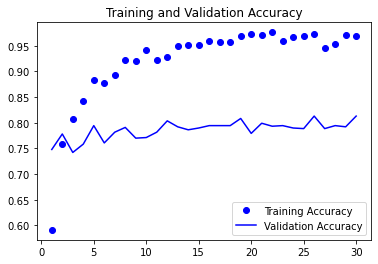

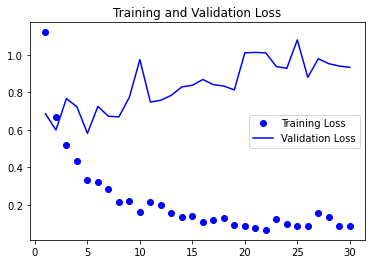

In [25]:
# Visualizing the performance of the pretrained model
acc = history_vgg.history['accuracy']
loss = history_vgg.history['loss']
val_acc = history_vgg.history['val_accuracy']
val_loss = history_vgg.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [21]:
# The model is overfitted very quickly
# Using some regularization technique can be a way out

# Section 03
Using pretrained model along with data augmentation

Now we make a CNN which is based on pretrained model but also support data augmentation. But a very important point to remember that it is very much computational expensive and not adviced to do without GPU.

In [9]:
# We will use the image generator which was used in the section 01
# Now let's create the model

model_vgg_aug = models.Sequential()
model_vgg_aug.add(conv_base)
model_vgg_aug.add(layers.Flatten())
model_vgg_aug.add(layers.Dense(256, activation=activations.relu))
model_vgg_aug.add(layers.Dense(5, activation=activations.softmax))
model_vgg_aug.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3277056   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 17,993,029
Trainable params: 17,993,029
Non-trainable params: 0
_________________________________________________________________


In [14]:
# We must freeze the base network otherwise it will be also trained and the whole purpose of using
    # pretrained model will be lost
print('The number of trainable weights before freezing:', len(model_vgg_aug.trainable_weights))
conv_base.trainable = False
print('The number of trainable weights after freezing:', len(model_vgg_aug.trainable_weights))


The number of trainable weights before freezing: 30
The number of trainable weights after freezing: 4


In [16]:
# Let#s compile the modle. Compilation must happen after freezing the model, otherwise freezing won't work
model_vgg_aug.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy,
                      metrics=['accuracy'])

In [18]:
# Now train the model
history_vgg_aug = model_vgg_aug.fit_generator(train_generator, steps_per_epoch=109,
                              validation_data=validation_generator, validation_steps=27, 
                              epochs=20)

Epoch 1/20
109/109 [==============================] - 38s 344ms/step - loss: 1.4347 - accuracy: 0.3819 - val_loss: 1.4213 - val_accuracy: 0.3926
Epoch 2/20
109/109 [==============================] - 38s 349ms/step - loss: 1.4160 - accuracy: 0.3836 - val_loss: 1.4221 - val_accuracy: 0.3926
Epoch 3/20
109/109 [==============================] - 37s 343ms/step - loss: 1.4157 - accuracy: 0.3897 - val_loss: 1.4074 - val_accuracy: 0.4019
Epoch 4/20
109/109 [==============================] - 38s 348ms/step - loss: 1.4036 - accuracy: 0.3885 - val_loss: 1.4033 - val_accuracy: 0.4019
Epoch 5/20
109/109 [==============================] - 38s 345ms/step - loss: 1.3962 - accuracy: 0.4032 - val_loss: 1.3877 - val_accuracy: 0.4193
Epoch 6/20
109/109 [==============================] - 38s 349ms/step - loss: 1.3986 - accuracy: 0.4053 - val_loss: 1.3789 - val_accuracy: 0.4042
Epoch 7/20
109/109 [==============================] - 38s 349ms/step - loss: 1.3959 - accuracy: 0.4012 - val_loss: 1.3875 - val_ac

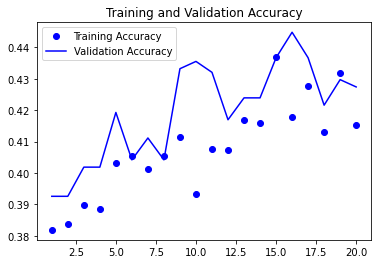

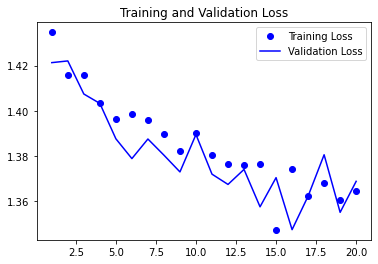

In [19]:
# Visualizing the performance of the pretrained model
acc = history_vgg_aug.history['accuracy']
loss = history_vgg_aug.history['loss']
val_acc = history_vgg_aug.history['val_accuracy']
val_loss = history_vgg_aug.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
# validation accuracy is low as training accuracy
# more complexity in the training network also in augmentation can be a solution